# Live Coding


1. Setup

* “Vamos a comparar probabilidad teórica vs simulación. Si repetimos muchas veces, las frecuencias se acercan a la teoría.”

In [ ]:
import numpy as np
import pandas as pd
from itertools import product

rng = np.random.default_rng(42)  # reproducible


2. Simulamos el lanzamiento de un dado y una moneda

In [ ]:
# Una corrida
moneda = rng.choice(["C", "S"])      # C=cara, S=sello
dado = rng.integers(1, 7)            # 1..6
(moneda, dado)


(np.str_('S'), np.int64(3))

3. Representamos el espacio muestral combinado

* El espacio muestral son todos los pares (moneda, dado)

In [ ]:
S = list(product(["C", "S"], range(1, 7)))
S, len(S)


([('C', 1),
  ('C', 2),
  ('C', 3),
  ('C', 4),
  ('C', 5),
  ('C', 6),
  ('S', 1),
  ('S', 2),
  ('S', 3),
  ('S', 4),
  ('S', 5),
  ('S', 6)],
 12)

["C","S"] son los posibles resultados de la moneda: Cara (C) o Sello (S).

range(1,7) genera los posibles resultados del dado: 1, 2, 3, 4, 5, 6 (ojo: el 7 no se incluye).

product(...) (de itertools) arma el producto cartesiano: todas las combinaciones posibles entre moneda y dado.

4. Calculamos probabilidades simples

Teórica

In [ ]:
A = [(m, d) for (m, d) in S if d % 2 == 1]  # dado impar
len(A), len(S), len(A)/len(S)


(6, 12, 0.5)

Simulada

In [ ]:
N = 10000
monedas = rng.choice(["C", "S"], size=N)
dados = rng.integers(1, 7, size=N)

df = pd.DataFrame({"moneda": monedas, "dado": dados})
p_sim_impar = (df["dado"] % 2 == 1).mean()
p_sim_impar


np.float64(0.5026)

5. Regla del producto en eventos sucesivos

Define dos eventos:
* B: “¿Salió cara?”
* C: “¿Salió 6?”

P(B∩C)=P(B)⋅P(C)= (1/2) * (1/6)​= 1/12​

Teórica:

In [ ]:
p_teo = (1/2) * (1/6)
p_teo


0.08333333333333333

Simulada:

In [ ]:
p_sim = ((df["moneda"] == "C") & (df["dado"] == 6)).mean()
p_sim


np.float64(0.0787)

6. Usamos random/numpy para reproducir experimentos múltiples (y ver convergencia)

In [ ]:
def sim_prob(N, seed=42):
    r = np.random.default_rng(seed)
    monedas = r.choice(["C", "S"], size=N)
    dados = r.integers(1, 7, size=N)
    return ((monedas == "C") & (dados == 6)).mean()

Ns = [10, 50, 100, 500, 1000, 10000]
tabla = pd.DataFrame({
    "N": Ns,
    "P_sim(C y 6)": [sim_prob(n) for n in Ns],
    "P_teo(C y 6)": [1/12]*len(Ns)
})
tabla


,N,P_sim(C y 6),P_teo(C y 6)
0,10,0.1000,0.083333
1,50,0.0400,0.083333
2,100,0.0400,0.083333
3,500,0.0880,0.083333
4,1000,0.0980,0.083333
5,10000,0.0787,0.083333


7. Árbol de probabilidades para organizar resultados

* Nivel 1: C (1/2), S (1/2)
* Nivel 2 desde cada rama: 1..6 (1/6 cada uno)

Cada hoja=1/12 x 1/2 = 1/12

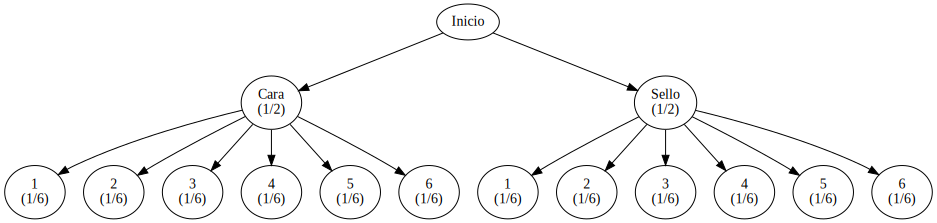

In [ ]:
from graphviz import Digraph

dot = Digraph()
dot.node("I", "Inicio")

dot.node("C", "Cara\n(1/2)")
dot.node("S", "Sello\n(1/2)")
dot.edge("I", "C")
dot.edge("I", "S")

for i in range(1, 7):
    dot.node(f"C{i}", f"{i}\n(1/6)")
    dot.node(f"S{i}", f"{i}\n(1/6)")
    dot.edge("C", f"C{i}")
    dot.edge("S", f"S{i}")

dot


8.Cierre:

En los datos reales, la aleatoriedad no significa falta de sentido, sino variabilidad natural.
Nuestro objetivo como analistas no es eliminarla, sino comprenderla y modelarla para extraer información confiable.


En Data Science, los datos nunca son perfectamente determinísticos.
La presencia de aleatoriedad es inevitable, y reconocerla es clave para interpretar resultados, estimar incertidumbre y tomar decisiones informadas

# Ejercicio 1

## 1) Definimos eventos

**Evento real**

F: la transacción sí es fraude

¬F: la transacción no es fraude


**Evento del modelo (predicción):**

M: el modelo indica “Fraude”

¬M: el modelo indica “No Fraude”

Parámetros del ejercicio:

- \(P(F)=0.10\)
- \(P(¬F)=0.90\)
- \(P(M | F)=0.90\)  (sensibilidad / recall)
- \(P(M | ¬F)=0.05\) (falso positivo)


*De todas las transacciones, solo un 10% son realmente fraude.*

En notación:
* P(F) = 0.10
* P(¬F) = 0.90

*Probabilidad de que el modelo lo detecte como fraude si lo es (90%)*

En notación:
* P(M | F) = 0.90

*Probabilidad de que el modelo detecte fraude en una transacción que no lo es (5%)*

En notación:
* P(M | ¬F) = 0.05

Esto es el falso positivo.

**Cargar parámetros en Python**

In [ ]:

p_F = 0.10             # “la transacción sí es fraude” = 10%.
p_notF = 1 - p_F       # “no es fraude”

p_M_given_F = 0.90     # P(M | F): “el modelo dice Fraude dado que sí era fraude” (sensibilidad/recall).
p_M_given_notF = 0.05  # P(M | ¬F): “el modelo dice Fraude dado que no era fraude” (falso positivo)

p_notM_given_F = 1 - p_M_given_F       # P(¬M | F): si era fraude real, ¿qué probabilidad hay de que el modelo diga “No Fraude”? (falso negativo).
p_notM_given_notF = 1 - p_M_given_notF # P(¬M | ¬F): si no era fraude real, ¿qué probabilidad hay de que el modelo diga “No Fraude”? (verdadero negativo).

p_F, p_notF, p_M_given_F, p_M_given_notF


(0.1, 0.9, 0.9, 0.05)

**Árbol mental**

Inicio
│
├── F (0.10)  → Fraude real<br>
│   │
│   ├── M   (0.90)  → Fraude bien detectado (Verdadero Positivo)<br>
│   │
│   └── ¬M  (0.10)  → Fraude no detectado (Falso Negativo)<br>
│
└── ¬F (0.90) → No fraude real<br>
    │
    ├── M   (0.05)  → Falso positivo<br>
    │
    └── ¬M  (0.95)  → Acierto (Verdadero Negativo)<br>



*Cada camino del árbol es un evento conjunto, y su probabilidad se obtiene multiplicando las probabilidades de la rama.*

Probabilidades conjuntas (caminos del árbol)

In [ ]:
# Caminos del árbol (probabilidades conjuntas)
p_F_and_M = p_F * p_M_given_F
p_F_and_notM = p_F * p_notM_given_F

p_notF_and_M = p_notF * p_M_given_notF
p_notF_and_notM = p_notF * p_notM_given_notF

p_F_and_M, p_notF_and_M


(0.09000000000000001, 0.045000000000000005)

Probabilidad total de que el modelo indique “Fraude” (P(M))

In [ ]:
# Probabilidad total de que el modelo indique fraude
p_M = p_F_and_M + p_notF_and_M
p_M


0.135

Bayes: P(F | M)

In [ ]:
# Bayes: probabilidad de fraude real dado que el modelo marcó fraude
p_F_given_M = p_F_and_M / p_M
p_F_given_M


0.6666666666666667

Resumen

In [ ]:
print("Resultados:")
print(f"P(M) = {p_M:.3f}  → el modelo marca fraude en {p_M*100:.1f}% de las transacciones")
print(f"P(F|M) = {p_F_given_M:.3f} → si el modelo marca fraude, {p_F_given_M*100:.1f}% es fraude real")


Resultados:
P(M) = 0.135  → el modelo marca fraude en 13.5% de las transacciones
P(F|M) = 0.667 → si el modelo marca fraude, 66.7% es fraude real


## Interpretación

- El modelo marca fraude en **13.5%** de las transacciones.
- Pero, cuando marca fraude, solo **≈66.7%** de esas alertas son realmente fraude.

**Idea clave:** aunque el modelo tenga buen recall (90%) y pocos falsos positivos (5%),  
el fraude es poco frecuente (10%), y eso afecta mucho la confiabilidad de una alerta.


# **PARTE 2**

## Live Coding

Modelaremos un test diagnóstico con sensibilidad y tasa de falsos positivos, analizando cómo la prevalencia de la enfermedad influye en la probabilidad real de padecerla dado un resultado positivo.

0. Setup

In [ ]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(42)
pd.set_option("display.float_format", lambda x: f"{x:0.4f}")  # opción controla el formato de visualización de números en pandas


1. Simularemos un test de diagnóstico con falso positivo/falso negativo

Simularemos 50,000 individuos evaluados con una prueba diagnóstica:

Parámetros:
* Prevalencia (10%): 10% de la población tiene la condición
* Sensibilidad (90%): La prueba detecta correctamente el 90% de los casos positivos
* Tasa de falsos positivos (5%): La prueba da positivo en el 5% de los sanos

In [ ]:
# Parámetros del “mundo”
p_cond = 0.10     # Prevalencia: P(Condición) -> proporción real con la condición
sens   = 0.90     # Sensibilidad: P(Test + | Condición)  -> detecta cuando sí está
fpr    = 0.05     # Falso positivo: P(Test + | No condición)

# Derivados útiles
spec = 1 - fpr    # Especificidad: P(Test - | No condición)
fnr  = 1 - sens   # Falso negativo: P(Test - | Condición)

N = 50000

# 1) Evento real: tiene condición (C) o no (¬C)
C = rng.random(N) < p_cond

# 2) Resultado del test: positivo (T) o negativo (¬T)
T = np.empty(N, dtype=bool)
T[C]  = rng.random(C.sum())  < sens
T[~C] = rng.random((~C).sum()) < fpr

df = pd.DataFrame({"Condicion_real": C, "Test_positivo": T})
df.head()



,Condicion_real,Test_positivo
0,False,False
1,False,False
2,False,False
3,False,False
4,True,True


2. Crearemos una tabla de contingencia (casos reales vs predicción)


In [ ]:
ct = pd.crosstab(
    df["Condicion_real"], df["Test_positivo"],
    rownames=["Real (Condición)"], colnames=["Test (+)"]
)
ct

Test (+),False,True
Real (Condición),,
False,42768,2291
True,499,4442


Verdaderos Positivos (VP), Falsos Positivos (FP), etc.
* VP = 4442  # Tienen condición Y test +
* FP = 2291  # NO tienen condición pero test +
* VN = 42768 # NO tienen condición Y test -
* FN = 499   # Tienen condición pero test

Conclusión importante: Solo el 66% de los que dieron positivo realmente tienen la condición.

Esto ocurre porque:
* Aunque la prueba es bastante buena (90% sensibilidad, 95% especificidad)
* La condición es rara (solo 10% de prevalencia)
* Hay muchas más personas sanas (45,059) que enfermas (4,941)
* Por lo tanto, incluso un pequeño 5% de falsos positivos en sanos genera 2,291 falsos positivos

3. Calcularemos la probabilidad de tener la condición dado que el test dio positivo


In [ ]:
TP = ct.loc[True,  True]   # condición y test +
FN = ct.loc[True,  False]  # condición y test -
FP = ct.loc[False, True]   # no condición y test +
TN = ct.loc[False, False]  # no condición y test -

# Probabilidad buscada (Valor predictivo positivo)
ppv = TP / (TP + FP)  # P(Condición | Test +)

# Otras métricas para contexto
p_T = (TP + FP) / N
npv = TN / (TN + FN)  # P(No condición | Test -)
sens_emp = TP / (TP + FN)
spec_emp = TN / (TN + FP)

resumen = pd.DataFrame({
    "Metrica": ["P(Test +)", "P(Condición | Test +) (PPV)", "P(No cond | Test -) (NPV)",
                "Sensibilidad empírica", "Especificidad empírica"],
    "Valor":  [p_T, ppv, npv, sens_emp, spec_emp]
})
resumen


,Metrica,Valor
0,P(Test +),0.1347
1,P(Condición | Test +) (PPV),0.6597
2,P(No cond | Test -) (NPV),0.9885
3,Sensibilidad empírica,0.8990
4,Especificidad empírica,0.9492


Análisis de las métricas
1. P(Test +) = 0.1347 (13.47%)
La probabilidad de que alguien dé positivo en el test. De tus 50,000 personas:

Test positivos = 4,442 + 2,291 = 6,733
6,733 / 50,000 = 13.47%

2. P(Condición | Test +) = 0.6597 (65.97%) → VPP
Esta es la métrica clave: De los que dieron positivo, solo el 66% realmente tiene la condición.

4,442 verdaderos positivos / 6,733 total positivos = 65.97%
Implicación práctica: 1 de cada 3 resultados positivos es falso

3. P(No cond | Test -) = 0.9885 (98.85%) → VPN
De los que dieron negativo, el 98.85% realmente NO tiene la condición.

42,768 / 43,267 = 98.85%
Implicación: Un resultado negativo es muy confiable

4. Sensibilidad empírica = 0.8990 (89.90%)
Confirmación de que la prueba detecta ~90% de los casos reales

4,442 / 4,941 = 89.90% ✓

5. Especificidad empírica = 0.9492 (94.92%)
Confirmación de que la prueba es negativa en ~95% de los sanos

42,768 / 45,059 = 94.92% ✓

4. Reflexionaremos sobre la independencia del test

In [ ]:
# Probabilidades condicionales observadas
p_T_given_C = TP / (TP + FN)      # P(T+ | C)
p_T_given_notC = FP / (FP + TN)   # P(T+ | ¬C)
p_T_overall = (TP + FP) / N       # P(T+)

comparacion = pd.DataFrame({
    "Probabilidad": ["P(T+ | C)", "P(T+ | ¬C)", "P(T+) total"],
    "Valor": [p_T_given_C, p_T_given_notC, p_T_overall]
})
comparacion



,Probabilidad,Valor
0,P(T+ | C),0.8990
1,P(T+ | ¬C),0.0508
2,P(T+) total,0.1347


Análisis de las probabilidades:

* P(T+ | C) = 0.8990 → Probabilidad de test positivo dado que SÍ tiene la condición (Sensibilidad)
* P(T+ | ¬C) = 0.0508 → Probabilidad de test positivo dado que NO tiene la condición (FPR)
* P(T+) total = 0.1347 → Probabilidad marginal de test positivo

Si el test fuera independiente de la condición:

 P(T+|C) = P(T+)

 y también P(T+|¬C) = P(T+).

Pero vemos que P(T+|C) es muy distinta de P(T+|¬C) → hay dependencia (es un modelo condicional).

5. Compararemos cómo cambia la probabilidad total si cambian las proporciones

In [ ]:
def ppv_teorico(prevalencia, sens=0.90, fpr=0.05):
    pC = prevalencia
    pNotC = 1 - pC
    pT = sens*pC + fpr*pNotC
    return (sens*pC) / pT

prevalencias = [0.01, 0.05, 0.10, 0.30, 0.50]
tabla_prev = pd.DataFrame({
    "Prevalencia P(C)": prevalencias,
    "PPV = P(C | T+)": [ppv_teorico(p, sens, fpr) for p in prevalencias],
    "P(T+) total": [sens*p + fpr*(1-p) for p in prevalencias],
})
tabla_prev


,Prevalencia P(C),PPV = P(C | T+),P(T+) total
0,0.0100,0.1538,0.0585
1,0.0500,0.4865,0.0925
2,0.1000,0.6667,0.1350
3,0.3000,0.8852,0.3050
4,0.5000,0.9474,0.4750


PPV = P(C | T+) Si mi test dio POSITIVO, ¿qué probabilidad hay de que realmente tenga la condición?"

P(T+): probabilidad de que cualquier persona dé positivo en el test, sin importar si realmente tiene o no la condición.

* "A mayor prevalencia, si doy positivo en el test, mayor probabilidad hay de que realmente tenga la condición"

| Prevalencia | P(T+) total | Interpretación |
|-------------|-------------|----------------|
| 1% | 5.85% | Solo ~6 de cada 100 darán positivo |
| 5% | 9.25% | ~9 de cada 100 darán positivo |
| 10% | 13.50% | ~14 de cada 100 darán positivo |
| 30% | 30.50% | ~31 de cada 100 darán positivo |
| 50% | 47.50% | ~48 de cada 100 darán positivo |

6. Visualizaremos con pandas o numpy y trazamos conclusiones

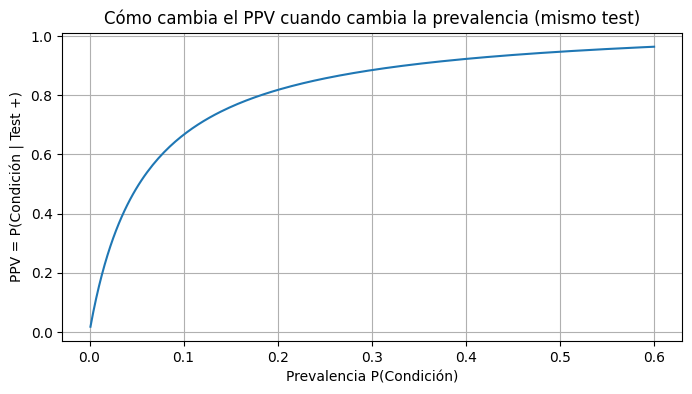

In [ ]:
import matplotlib.pyplot as plt

xs = np.linspace(0.001, 0.60, 200)
ys = [ppv_teorico(x, sens, fpr) for x in xs]

"""
sens   = 0.90     # Sensibilidad: P(Test + | Condición)  -> detecta cuando sí está
fpr    = 0.05     # Falso positivo: P(Test + | No condición)
"""

plt.figure(figsize=(8,4))
plt.plot(xs, ys)
plt.xlabel("Prevalencia P(Condición)")
plt.ylabel("PPV = P(Condición | Test +)")
plt.title("Cómo cambia el PPV cuando cambia la prevalencia (mismo test)")
plt.grid(True)
plt.show()


* Con prevalencia baja, aunque el test sea “bueno”, un positivo puede ser “menos confiable”.
* Con prevalencia alta, el mismo positivo se vuelve más confiable.

7. Discutiremos qué implica esto en términos de análisis de datos y toma de decisiones



In [ ]:
conclusiones = [
    "1) Un mismo modelo/test puede 'verse' distinto según el contexto (prevalencia).",
    "2) Accuracy no basta: PPV/NPV importan porque conectan predicción con realidad.",
    "3) En fraudes/medicina/churn, cambiar la población (o el periodo) cambia P(real | pred).",
    "4) Decisiones dependen de costos: falso positivo vs falso negativo no valen lo mismo.",
    "5) Antes de automatizar decisiones, hay que calibrar, monitorear y segmentar por contexto."
]
for c in conclusiones:
    print(c)

print("\nPreguntas para discusión:")
print("- ¿Qué error es más caro aquí: falso positivo o falso negativo?")
print("- ¿Cómo cambia tu decisión si la prevalencia baja a 1%?")
print("- ¿Aplicarías el mismo umbral de decisión en todos los segmentos/poblaciones?")


1) Un mismo modelo/test puede 'verse' distinto según el contexto (prevalencia).
2) Accuracy no basta: PPV/NPV importan porque conectan predicción con realidad.
3) En fraudes/medicina/churn, cambiar la población (o el periodo) cambia P(real | pred).
4) Decisiones dependen de costos: falso positivo vs falso negativo no valen lo mismo.
5) Antes de automatizar decisiones, hay que calibrar, monitorear y segmentar por contexto.

Preguntas para discusión:
- ¿Qué error es más caro aquí: falso positivo o falso negativo?
- ¿Cómo cambia tu decisión si la prevalencia baja a 1%?
- ¿Aplicarías el mismo umbral de decisión en todos los segmentos/poblaciones?


### **árbol de probabilidades**

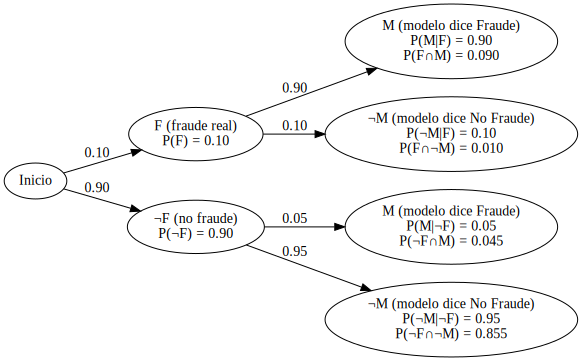

In [ ]:
from graphviz import Digraph

# Parámetros (ajusta si quieres)
p_F = 0.10
p_notF = 1 - p_F

p_M_given_F = 0.90
p_notM_given_F = 1 - p_M_given_F

p_M_given_notF = 0.05
p_notM_given_notF = 1 - p_M_given_notF

# Probabilidades conjuntas (para mostrar en hojas)
p_F_M = p_F * p_M_given_F
p_F_notM = p_F * p_notM_given_F
p_notF_M = p_notF * p_M_given_notF
p_notF_notM = p_notF * p_notM_given_notF

dot = Digraph("ArbolProb", format="png")
dot.attr(rankdir="LR", fontsize="12")

# Nodos
dot.node("S", "Inicio")
dot.node("F",  f"F (fraude real)\nP(F) = {p_F:.2f}")
dot.node("nF", f"¬F (no fraude)\nP(¬F) = {p_notF:.2f}")

dot.node("FM",  f"M (modelo dice Fraude)\nP(M|F) = {p_M_given_F:.2f}\nP(F∩M) = {p_F_M:.3f}")
dot.node("FnM", f"¬M (modelo dice No Fraude)\nP(¬M|F) = {p_notM_given_F:.2f}\nP(F∩¬M) = {p_F_notM:.3f}")

dot.node("nFM",  f"M (modelo dice Fraude)\nP(M|¬F) = {p_M_given_notF:.2f}\nP(¬F∩M) = {p_notF_M:.3f}")
dot.node("nFnM", f"¬M (modelo dice No Fraude)\nP(¬M|¬F) = {p_notM_given_notF:.2f}\nP(¬F∩¬M) = {p_notF_notM:.3f}")

# Aristas
dot.edge("S", "F",  label=f"{p_F:.2f}")
dot.edge("S", "nF", label=f"{p_notF:.2f}")

dot.edge("F",  "FM",  label=f"{p_M_given_F:.2f}")
dot.edge("F",  "FnM", label=f"{p_notM_given_F:.2f}")

dot.edge("nF", "nFM",  label=f"{p_M_given_notF:.2f}")
dot.edge("nF", "nFnM", label=f"{p_notM_given_notF:.2f}")

dot
